In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, RepeatedKFold, ShuffleSplit, StratifiedKFold
from sklearn.model_selection import learning_curve, validation_curve

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#Загружаем данные и выводим первые 5 строк
data=pd.read_csv('data.csv', sep=",")
data.head()

genres  acousticness  danceability   duration_ms    energy  \
0  21st century classical      0.983000      0.218500  1.496130e+05  0.018350   
1                   432hz      0.485070      0.330000  1.059273e+06  0.463084   
2                      []      0.686395      0.516830  2.305397e+05  0.397491   
3              a cappella      0.666036      0.576732  1.961439e+05  0.334535   
4                abstract      0.352395      0.489100  3.429772e+05  0.509300   

   instrumentalness  liveness   loudness  speechiness       tempo   valence  \
0          0.874000  0.112800 -37.256000     0.038750   69.526500  0.062900   
1          0.480393  0.118862 -17.099000     0.086288  125.227125  0.217675   
2          0.202883  0.221324 -12.773475     0.109871  111.933224  0.513905   
3          0.028486  0.128292 -13.011177     0.106782  112.461108  0.502521   
4          0.788033  0.122317 -13.812100     0.044157  124.176500  0.354130   

   popularity  key  mode  
0   40.500000    1     1  
1   52.125000    6     1  
2   21.556669    7     1  
3   38.786415   11     1  
4   41.600000    1     1

In [3]:
#Размер датасета
data.shape

(599, 14)

In [4]:
#Список колонок
data.columns

Index(['genres', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'popularity', 'key', 'mode'],
      dtype='object')

In [5]:
#Список колонок с типами данных
data.dtypes

genres               object
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
popularity          float64
key                   int64
mode                  int64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            599 non-null    object 
 1   acousticness      599 non-null    float64
 2   danceability      599 non-null    float64
 3   duration_ms       599 non-null    float64
 4   energy            599 non-null    float64
 5   instrumentalness  599 non-null    float64
 6   liveness          599 non-null    float64
 7   loudness          599 non-null    float64
 8   speechiness       599 non-null    float64
 9   tempo             599 non-null    float64
 10  valence           599 non-null    float64
 11  popularity        599 non-null    float64
 12  key               599 non-null    int64  
 13  mode              599 non-null    int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 65.6+ KB


In [7]:
data.isnull().sum()

genres              0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
mode                0
dtype: int64

In [8]:
# Основные статистические характеристки набора данных
data.describe()

acousticness  danceability   duration_ms      energy  instrumentalness  \
count    599.000000    599.000000  5.990000e+02  599.000000        599.000000   
mean       0.439641      0.519666  2.501303e+05    0.539989          0.209001   
std        0.317190      0.145374  7.380178e+04    0.236451          0.265222   
min        0.000003      0.092900  7.101900e+04    0.010973          0.000000   
25%        0.149851      0.433811  2.079519e+05    0.380784          0.005892   
50%        0.377417      0.532000  2.381478e+05    0.572500          0.091184   
75%        0.714836      0.616257  2.744843e+05    0.715324          0.317390   
max        0.996000      0.902000  1.059273e+06    0.999500          0.938000   

         liveness    loudness  speechiness       tempo     valence  \
count  599.000000  599.000000   599.000000  599.000000  599.000000   
mean     0.192608  -11.118221     0.080810  118.331395    0.481272   
std      0.090624    5.788433     0.077541   16.915787    0.199777   
min      0.022200  -37.256000     0.027500   65.959000    0.027850   
25%      0.140415  -13.121100     0.044925  109.681315    0.337490   
50%      0.175842   -9.717333     0.059208  118.287798    0.502521   
75%      0.215613   -7.129215     0.084537  126.670681    0.616608   
max      0.718443   -1.598000     0.884000  200.341000    0.989000   

       popularity         key        mode  
count  599.000000  599.000000  599.000000  
mean    40.184049    6.230384    0.871452  
std     14.923754    3.336283    0.334978  
min      0.000000    0.000000    0.000000  
25%     33.038462    3.000000    1.000000  
50%     42.333333    7.000000    1.000000  
75%     50.391667    9.000000    1.000000  
max     82.000000   11.000000    1.000000

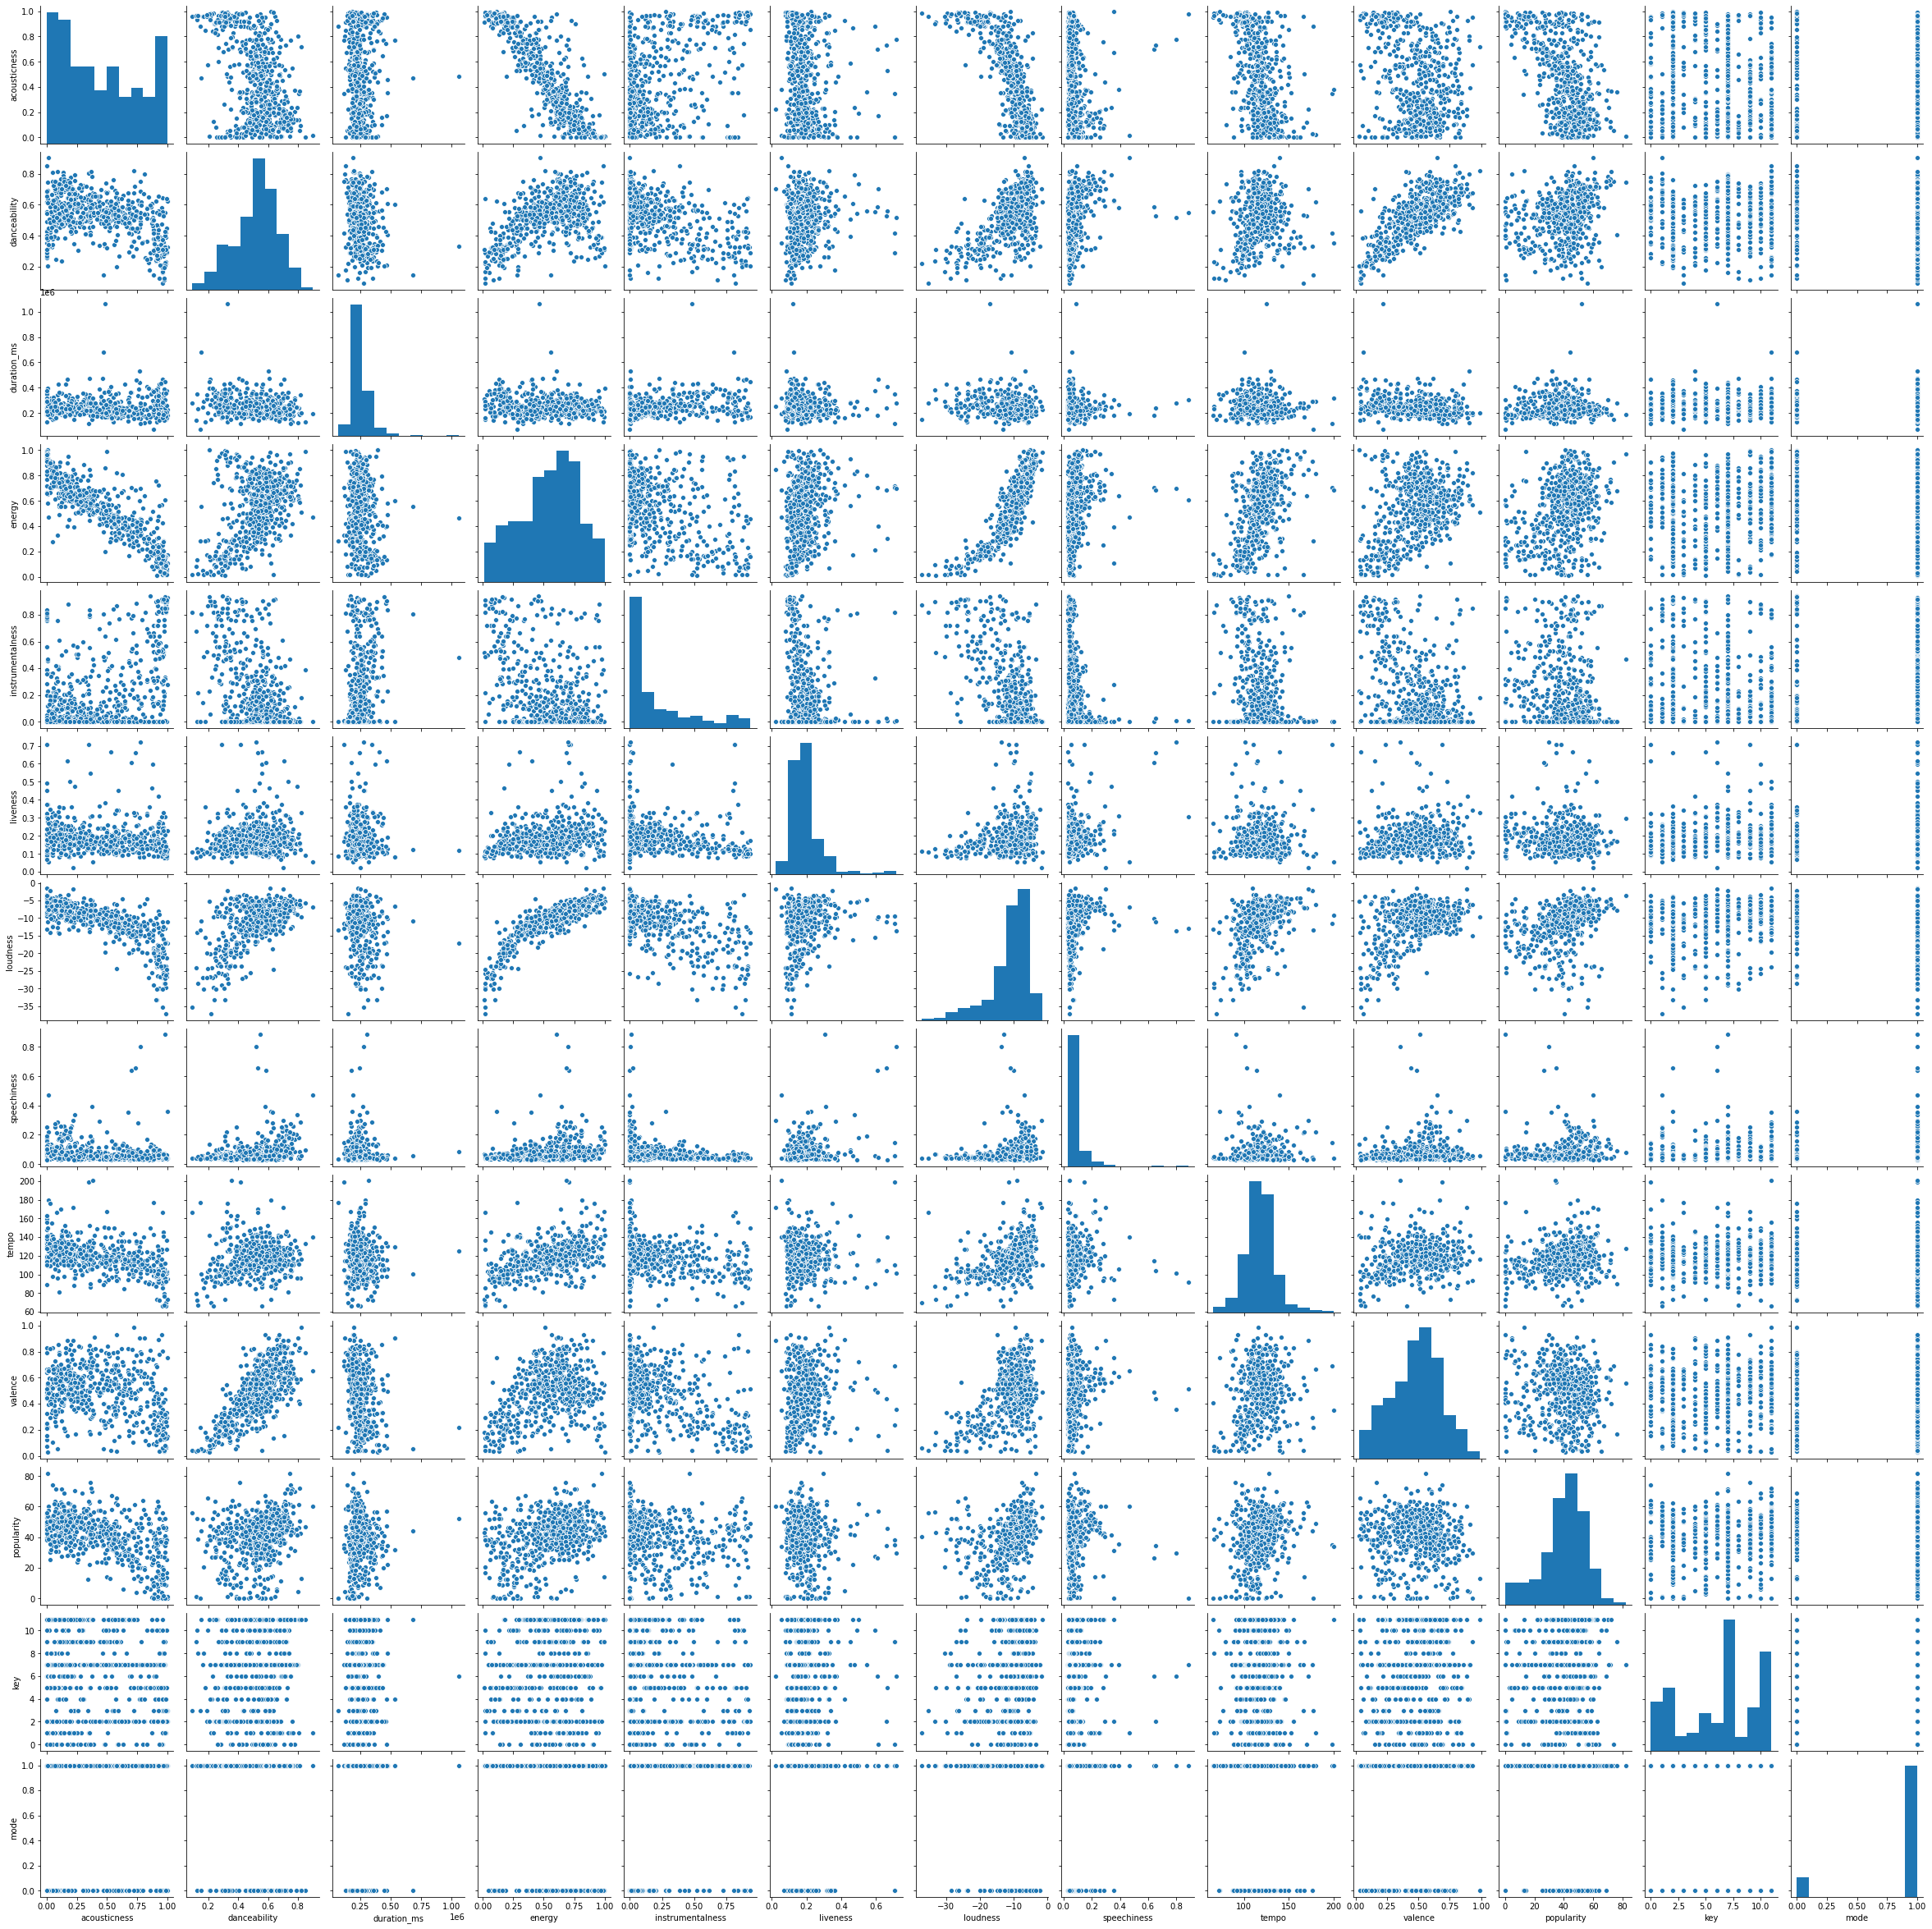

In [9]:
# Парные диаграммы
sns.pairplot(data)

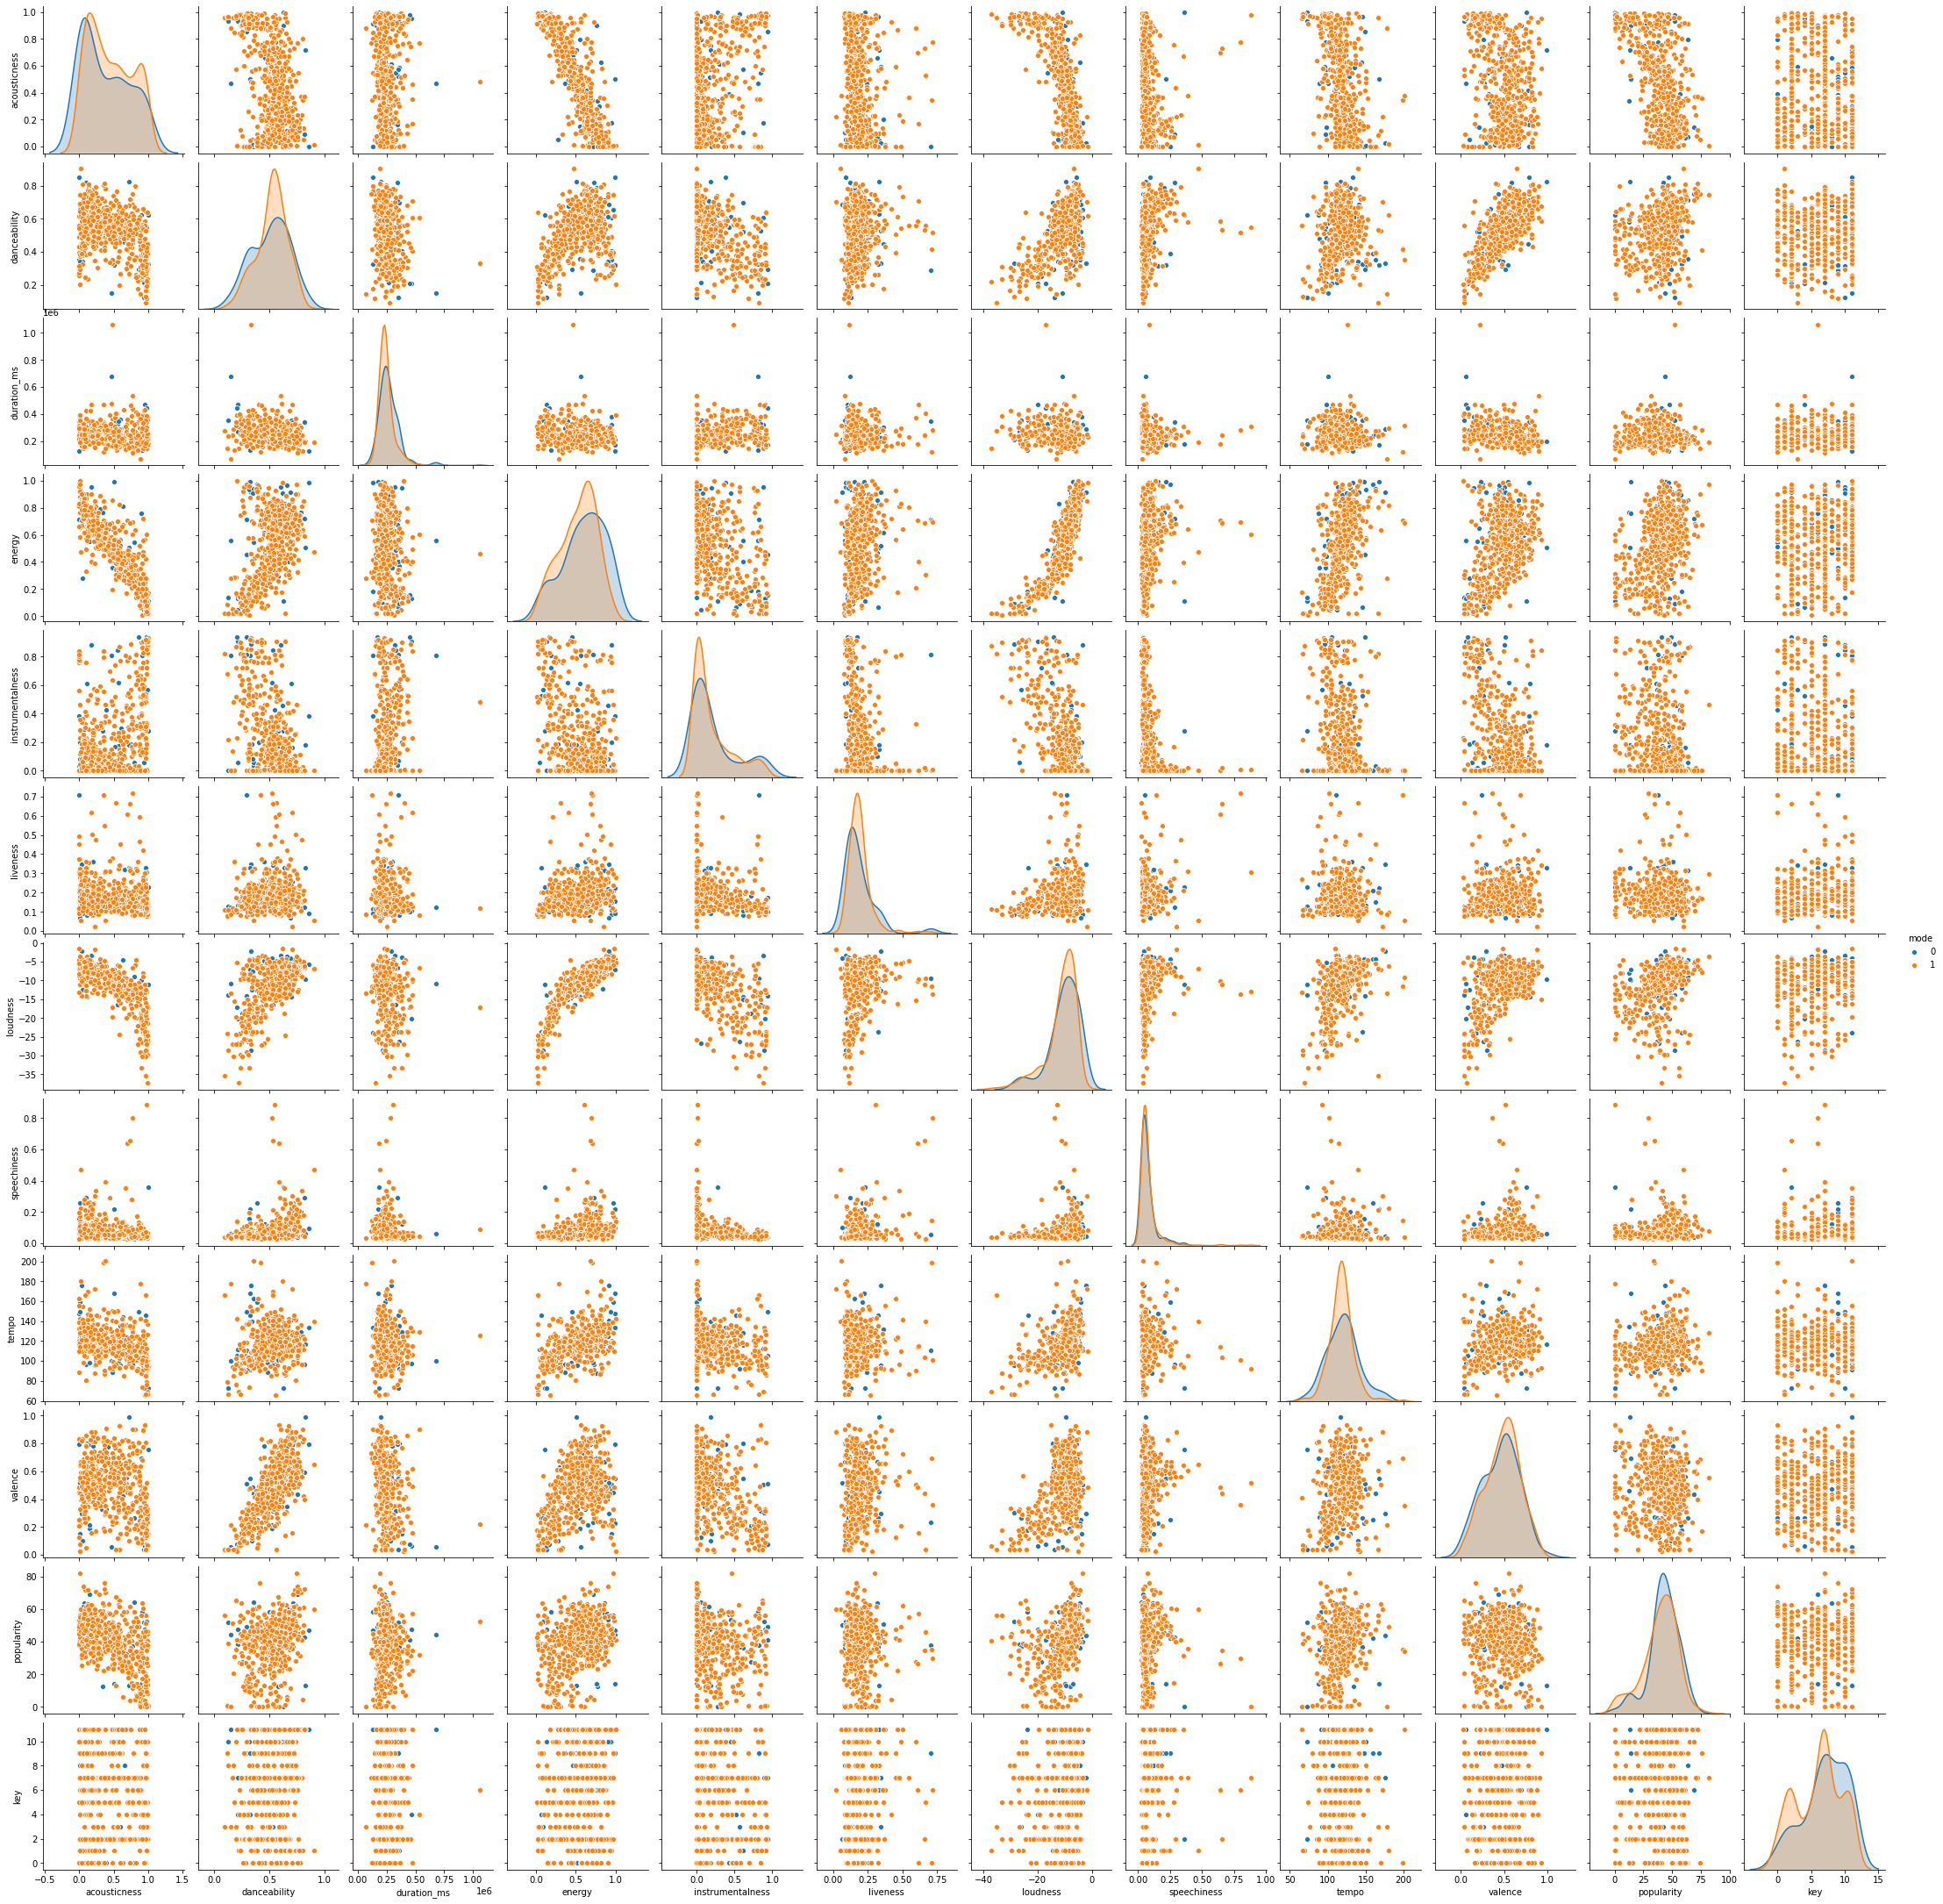

In [10]:
#Комбинация гистограмм и диаграмм рассеивания для всего набора данных.
sns.pairplot(data, hue="mode")

In [11]:
# Убедимся, что целевой признак
# для задачи бинарной классификации содержит только 0 и 1
data['mode'].unique()

array([1, 0], dtype=int64)

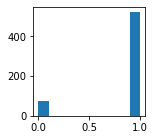

In [12]:
# Оценим дисбаланс классов для целевого признака
fig, ax = plt.subplots(figsize=(2,2)) 
plt.hist(data['mode'])
plt.show()

In [13]:
data['mode'].value_counts()

1    522
0     77
Name: mode, dtype: int64

In [14]:
# посчитаем дисбаланс классов
total = data.shape[0]
class_0, class_1 = data['mode'].value_counts()
print('Класс 0 составляет {}%, а класс 1 составляет {}%.'
      .format(round(class_0 / total, 4)*100, round(class_1 / total, 4)*100))

Класс 0 составляет 87.15%, а класс 1 составляет 12.85%.


In [15]:
data.columns

Index(['genres', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'popularity', 'key', 'mode'],
      dtype='object')

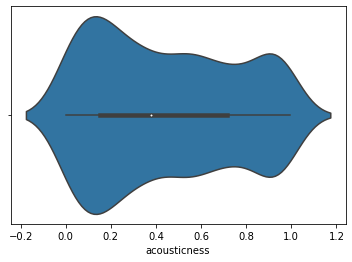

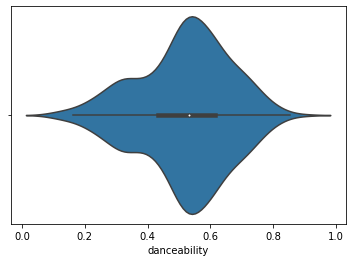

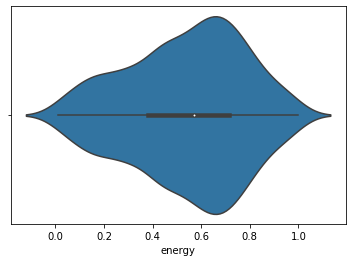

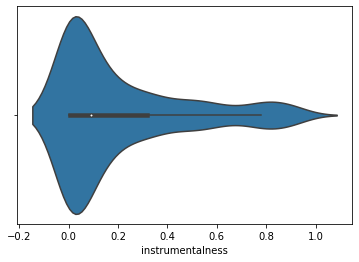

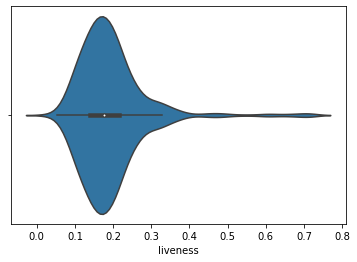

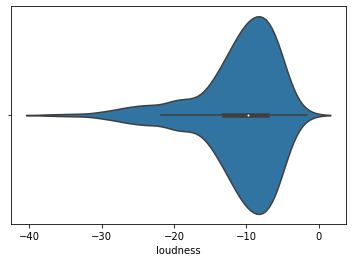

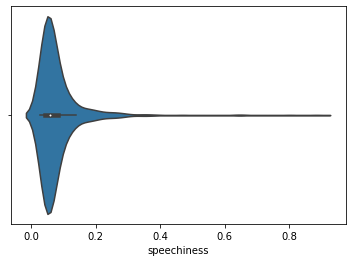

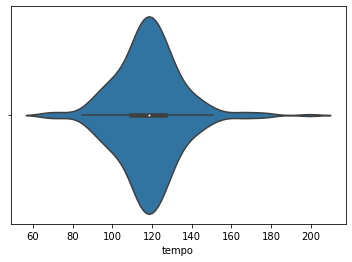

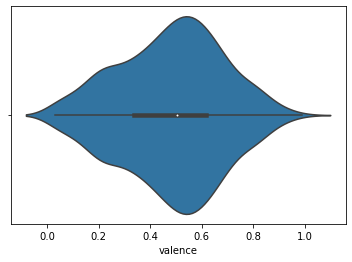

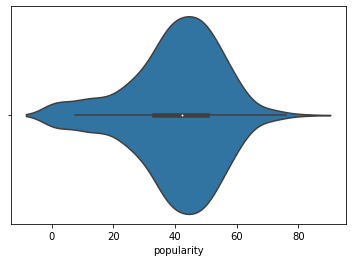

In [16]:
# Скрипичные диаграммы для числовых колонок
for col in ['acousticness',
       'danceability',
       'energy',
       'instrumentalness', 'liveness',
       'loudness',
       'speechiness', 'tempo',
       'valence', 'popularity']:
    sns.violinplot(x=data[col])
    plt.show()

In [17]:
# Выбор признаков, подходящих для построения моделей.
# Кодирование категориальных признаков. Масштабирование данных. 
# Формирование вспомогательных признаков, улучшающих качество моделей.

In [18]:
data.dtypes

genres               object
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
popularity          float64
key                   int64
mode                  int64
dtype: object

In [19]:
data.head()

genres  acousticness  danceability   duration_ms    energy  \
0  21st century classical      0.983000      0.218500  1.496130e+05  0.018350   
1                   432hz      0.485070      0.330000  1.059273e+06  0.463084   
2                      []      0.686395      0.516830  2.305397e+05  0.397491   
3              a cappella      0.666036      0.576732  1.961439e+05  0.334535   
4                abstract      0.352395      0.489100  3.429772e+05  0.509300   

   instrumentalness  liveness   loudness  speechiness       tempo   valence  \
0          0.874000  0.112800 -37.256000     0.038750   69.526500  0.062900   
1          0.480393  0.118862 -17.099000     0.086288  125.227125  0.217675   
2          0.202883  0.221324 -12.773475     0.109871  111.933224  0.513905   
3          0.028486  0.128292 -13.011177     0.106782  112.461108  0.502521   
4          0.788033  0.122317 -13.812100     0.044157  124.176500  0.354130   

   popularity  key  mode  
0   40.500000    1     1  
1   52.125000    6     1  
2   21.556669    7     1  
3   38.786415   11     1  
4   41.600000    1     1

In [29]:
# Числовые колонки для масштабирования
scale_cols = ['acousticness','danceability', 'energy', 'instrumentalness', 'liveness','loudness', 'speechiness', 'tempo',
'valence', 'popularity']

In [30]:
from sklearn.preprocessing import MinMaxScaler
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[scale_cols])

In [31]:
# Добавим масштабированные данные в набор данных
for i in range(len(scale_cols)):
    col = scale_cols[i]
    new_col_name = col + '_scaled'
    data[new_col_name] = sc1_data[:,i]

In [32]:
data.head()

genres  acousticness  danceability   duration_ms    energy  \
0  21st century classical      0.983000      0.218500  1.496130e+05  0.018350   
1                   432hz      0.485070      0.330000  1.059273e+06  0.463084   
2                      []      0.686395      0.516830  2.305397e+05  0.397491   
3              a cappella      0.666036      0.576732  1.961439e+05  0.334535   
4                abstract      0.352395      0.489100  3.429772e+05  0.509300   

   instrumentalness  liveness   loudness  speechiness       tempo  ...  \
0          0.874000  0.112800 -37.256000     0.038750   69.526500  ...   
1          0.480393  0.118862 -17.099000     0.086288  125.227125  ...   
2          0.202883  0.221324 -12.773475     0.109871  111.933224  ...   
3          0.028486  0.128292 -13.011177     0.106782  112.461108  ...   
4          0.788033  0.122317 -13.812100     0.044157  124.176500  ...   

   acousticness_scaled  danceability_scaled  energy_scaled  \
0             0.986948             0.155234       0.007462   
1             0.487016             0.293042       0.457358   
2             0.689151             0.523953       0.391003   
3             0.668710             0.597988       0.327317   
4             0.353808             0.489680       0.504110   

   instrumentalness_scaled  liveness_scaled  loudness_scaled  \
0                 0.931770         0.130127         0.000000   
1                 0.512146         0.138834         0.565287   
2                 0.216293         0.285997         0.686593   
3                 0.030369         0.152377         0.679927   
4                 0.840121         0.143796         0.657465   

   speechiness_scaled  tempo_scaled  valence_scaled  popularity_scaled  
0            0.013135      0.026547        0.036467           0.493902  
1            0.068637      0.441042        0.197498           0.635671  
2            0.096172      0.342116        0.505702           0.262886  
3            0.092565      0.346044        0.493857           0.473005  
4            0.019447      0.433224        0.339468           0.507317  

[5 rows x 24 columns]

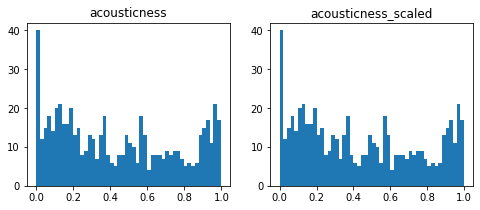

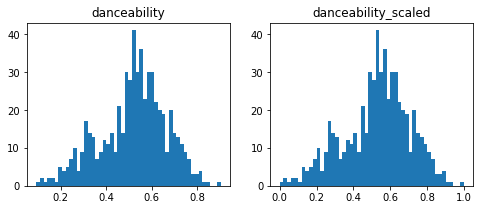

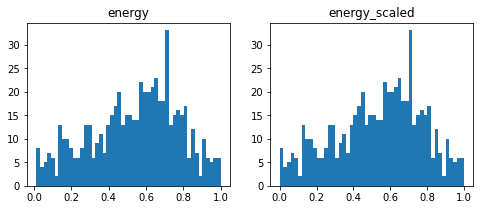

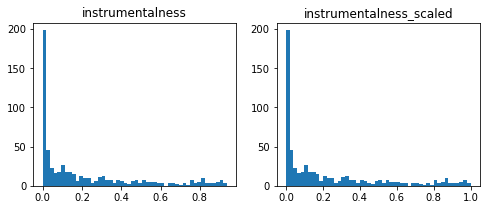

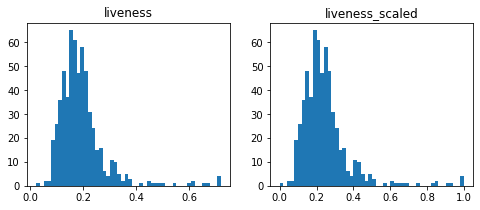

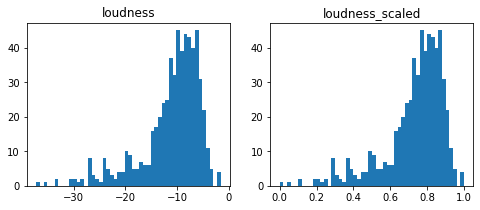

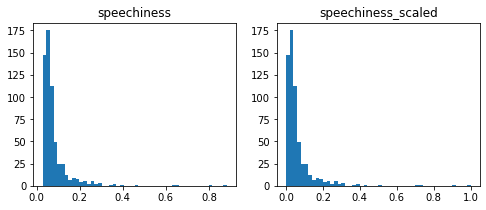

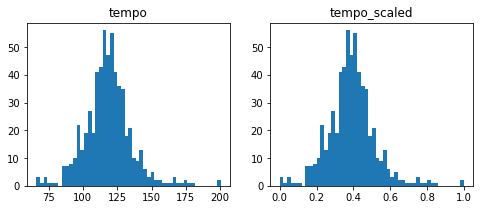

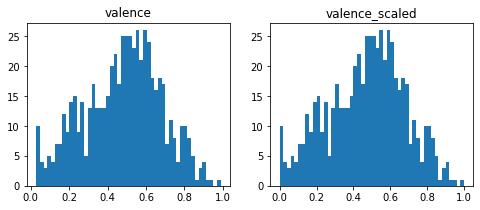

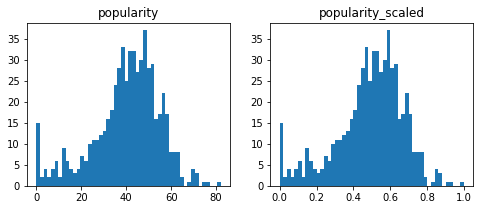

In [33]:
# Проверим, что масштабирование не повлияло на распределение данных
for col in scale_cols:
    col_scaled = col + '_scaled'

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(data[col], 50)
    ax[1].hist(data[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

In [34]:
#Проведение корреляционного анализа данных. 
#Формирование промежуточных выводов о возможности построения моделей машинного обучения.

In [35]:
corr_cols_1 = scale_cols + ['mode']
corr_cols_1

['acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence',
 'popularity',
 'mode']

In [36]:
scale_cols_postfix = [x+'_scaled' for x in scale_cols]
corr_cols_2 = scale_cols_postfix + ['mode']
corr_cols_2

['acousticness_scaled',
 'danceability_scaled',
 'energy_scaled',
 'instrumentalness_scaled',
 'liveness_scaled',
 'loudness_scaled',
 'speechiness_scaled',
 'tempo_scaled',
 'valence_scaled',
 'popularity_scaled',
 'mode']

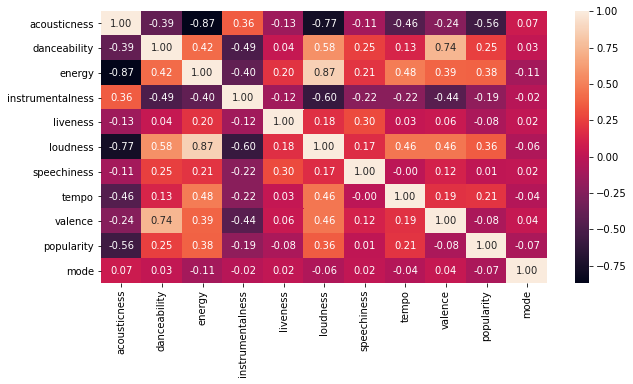

In [37]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data[corr_cols_1].corr(), annot=True, fmt='.2f')

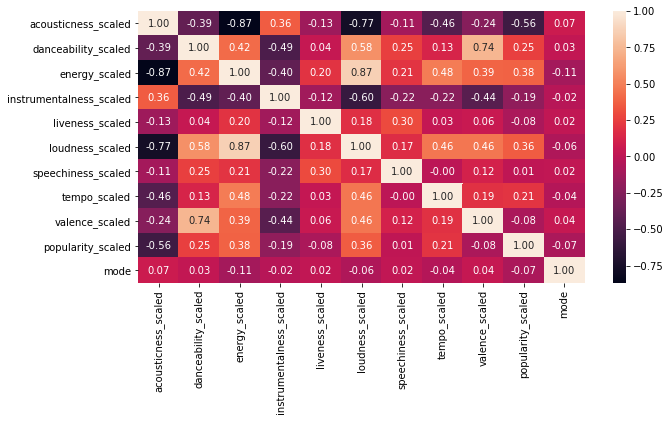

In [38]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data[corr_cols_2].corr(), annot=True, fmt='.2f')

In [39]:
#Сохранение и визуализация метрик

In [40]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()

In [41]:
#Формирование обучающей и тестовой выборок на основе исходного набора данных.

In [42]:
target = data['mode']
data = data.drop('mode', axis = 1)

In [43]:
data.columns

Index(['genres', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'popularity', 'key', 'acousticness_scaled',
       'danceability_scaled', 'energy_scaled', 'instrumentalness_scaled',
       'liveness_scaled', 'loudness_scaled', 'speechiness_scaled',
       'tempo_scaled', 'valence_scaled', 'popularity_scaled'],
      dtype='object')

In [45]:
data.head()

genres  acousticness  danceability   duration_ms    energy  \
0  21st century classical      0.983000      0.218500  1.496130e+05  0.018350   
1                   432hz      0.485070      0.330000  1.059273e+06  0.463084   
2                      []      0.686395      0.516830  2.305397e+05  0.397491   
3              a cappella      0.666036      0.576732  1.961439e+05  0.334535   
4                abstract      0.352395      0.489100  3.429772e+05  0.509300   

   instrumentalness  liveness   loudness  speechiness       tempo  ...  \
0          0.874000  0.112800 -37.256000     0.038750   69.526500  ...   
1          0.480393  0.118862 -17.099000     0.086288  125.227125  ...   
2          0.202883  0.221324 -12.773475     0.109871  111.933224  ...   
3          0.028486  0.128292 -13.011177     0.106782  112.461108  ...   
4          0.788033  0.122317 -13.812100     0.044157  124.176500  ...   

   acousticness_scaled  danceability_scaled  energy_scaled  \
0             0.986948             0.155234       0.007462   
1             0.487016             0.293042       0.457358   
2             0.689151             0.523953       0.391003   
3             0.668710             0.597988       0.327317   
4             0.353808             0.489680       0.504110   

   instrumentalness_scaled  liveness_scaled  loudness_scaled  \
0                 0.931770         0.130127         0.000000   
1                 0.512146         0.138834         0.565287   
2                 0.216293         0.285997         0.686593   
3                 0.030369         0.152377         0.679927   
4                 0.840121         0.143796         0.657465   

   speechiness_scaled  tempo_scaled  valence_scaled  popularity_scaled  
0            0.013135      0.026547        0.036467           0.493902  
1            0.068637      0.441042        0.197498           0.635671  
2            0.096172      0.342116        0.505702           0.262886  
3            0.092565      0.346044        0.493857           0.473005  
4            0.019447      0.433224        0.339468           0.507317  

[5 rows x 23 columns]

In [60]:
# Признаки для задачи классификации
task_clas_cols = ['liveness',
       'danceability',
       'energy',
       'tempo']

In [61]:
# Выборки для задачи классификации
clas_data = data[task_clas_cols]

In [62]:
clas_data.head()

liveness  danceability    energy       tempo
0  0.112800      0.218500  0.018350   69.526500
1  0.118862      0.330000  0.463084  125.227125
2  0.221324      0.516830  0.397491  111.933224
3  0.128292      0.576732  0.334535  112.461108
4  0.122317      0.489100  0.509300  124.176500

In [63]:
#деление на тестовую и обучающую выборку
clas_X_train, clas_X_test, clas_Y_train, clas_Y_test = train_test_split(
    clas_data, target, test_size=0.2, random_state=1)
clas_X_train.shape, clas_X_test.shape, clas_Y_train.shape, clas_Y_test.shape

((479, 4), (120, 4), (479,), (120,))

In [64]:
#Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. 
#Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
%matplotlib inline 
sns.set(style="ticks")

In [66]:
from sklearn.linear_model import LogisticRegression
# Модели
clas_models = {'LogR': LogisticRegression(), 
               'SVC':SVC(),
               'Tree':DecisionTreeClassifier(),
               'RF':RandomForestClassifier(),
               'GB':GradientBoostingClassifier()}

In [67]:
# Сохранение метрик
clasMetricLogger = MetricLogger()

In [68]:
def clas_train_model(model_name, model, clasMetricLogger):
    model.fit(clas_X_train, clas_Y_train)
    Y_pred = model.predict(clas_X_test)
    precision = precision_score(clas_Y_test.values, Y_pred)
    recall = recall_score(clas_Y_test.values, Y_pred)
    f1 = f1_score(clas_Y_test.values, Y_pred)
    roc_auc = roc_auc_score(clas_Y_test.values, Y_pred)
    
    clasMetricLogger.add('precision', model_name, precision)
    clasMetricLogger.add('recall', model_name, recall)
    clasMetricLogger.add('f1', model_name, f1)
    clasMetricLogger.add('roc_auc', model_name, roc_auc)

    print('*****************************************************')
    print(model)
    print('*****************************************************')
    draw_roc_curve(clas_Y_test.values, Y_pred)
    
    plot_confusion_matrix(model, clas_X_test, clas_Y_test.values, 
                      display_labels=['0','1'], 
                      cmap=plt.cm.Blues, normalize='true')
    plt.show()

In [69]:
# Отрисовка ROC-кривой
def draw_roc_curve(y_true, y_score, pos_label=1, average='micro'):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

*****************************************************
LogisticRegression()
*****************************************************


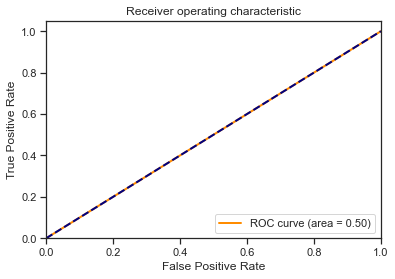

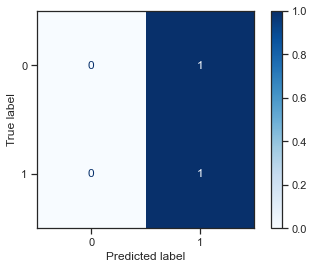

*****************************************************
SVC()
*****************************************************


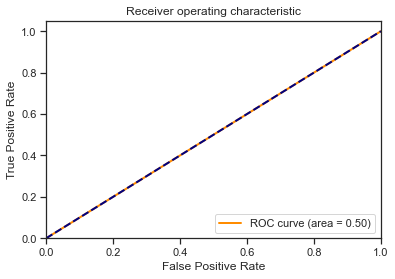

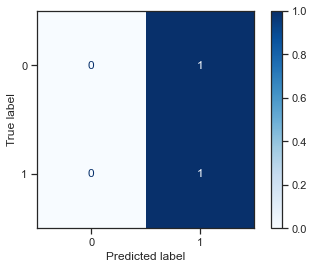

*****************************************************
DecisionTreeClassifier()
*****************************************************


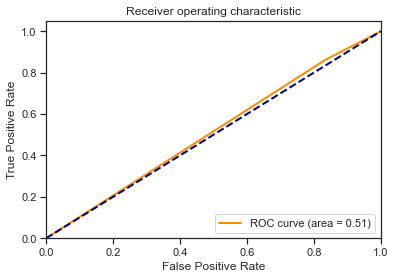

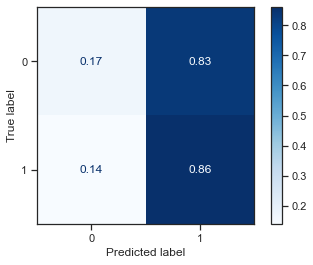

*****************************************************
RandomForestClassifier()
*****************************************************


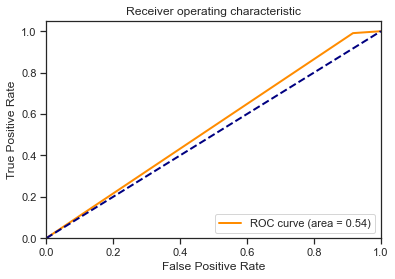

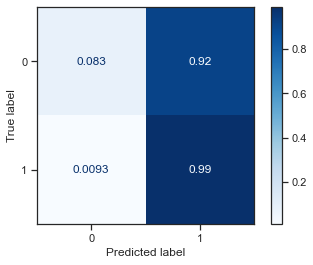

*****************************************************
GradientBoostingClassifier()
*****************************************************


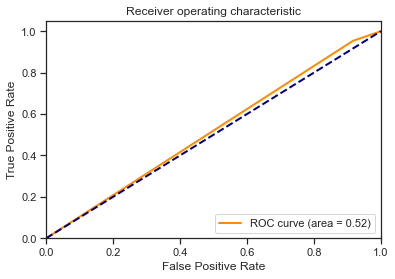

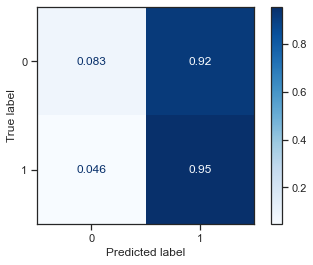

In [70]:
for model_name, model in clas_models.items():
    clas_train_model(model_name, model, clasMetricLogger)

In [71]:
#Подбор гиперпараметров для выбранных моделей. Рекомендуется использовать методы кросс-валидации. 
#В зависимости от используемой библиотеки можно применять функцию GridSearchCV, 
#использовать перебор параметров в цикле, или использовать другие методы.

In [72]:
clas_X_train.shape

(479, 4)

In [73]:
#Кроссвалидация
scores_log = cross_val_score(LogisticRegression(), 
                         clas_X_train, clas_Y_train, cv=2)
# Значение метрики accuracy для 2 фолдов
scores_log, np.mean(scores_log)

(array([0.8625    , 0.86610879]), 0.8643043933054393)

In [74]:
scores_svc = cross_val_score(SVC(gamma='auto'), 
                         clas_X_train, clas_Y_train, cv=2)
# Значение метрики accuracy для 2 фолдов
scores_svc, np.mean(scores_svc)

(array([0.85416667, 0.87029289]), 0.8622297768479776)

In [75]:
scores_tree = cross_val_score(DecisionTreeClassifier(), 
                         clas_X_train, clas_Y_train, cv=2)
# Значение метрики accuracy для 2 фолдов
scores_tree, np.mean(scores_tree)

(array([0.79166667, 0.79916318]), 0.7954149232914923)

In [76]:
scores_rand_tree = cross_val_score(RandomForestClassifier(), 
                         clas_X_train, clas_Y_train, cv=2)
# Значение метрики accuracy для 2 фолдов
scores_rand_tree, np.mean(scores_rand_tree)

(array([0.8625    , 0.83682008]), 0.8496600418410042)

In [77]:
scores_boost = cross_val_score(GradientBoostingClassifier(), 
                         clas_X_train, clas_Y_train, cv=2)
# Значение метрики accuracy для 2 фолдов
scores_boost, np.mean(scores_boost)

(array([0.83333333, 0.81589958]), 0.8246164574616457)

In [78]:
parameters = {'penalty':['l1', 'l2', 'elasticnet']}
clf_gs_log = GridSearchCV(LogisticRegression(), parameters, cv=5, scoring='accuracy')
clf_gs_log.fit(clas_X_train, clas_Y_train)

c:\users\андрей\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\андрей\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\андрей\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\users\андрей\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("E

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [79]:
# Лучшая модель
clf_gs_log.best_estimator_

LogisticRegression()

In [80]:
# Лучшее значение параметров
clf_gs_log.best_params_

{'penalty': 'l2'}

In [86]:
parameters = {'gamma':[140,130,120,110,100,70,50]}
clf_gs_svm_svc = GridSearchCV(SVC(), parameters, cv=5, scoring='accuracy')
clf_gs_svm_svc.fit(clas_X_train, clas_Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'gamma': [140, 130, 120, 110, 100, 70, 50]},
             scoring='accuracy')

In [87]:
# Лучшая модель
clf_gs_svm_svc.best_estimator_

SVC(gamma=140)

In [88]:
# Лучшее значение параметров
clf_gs_svm_svc.best_params_

{'gamma': 140}

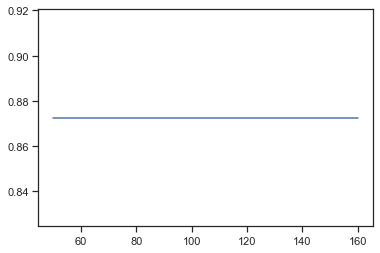

In [89]:
# Изменение качества на тестовой выборке в зависимости от параметра
n_range = np.array([160,130,100,70,65,60,50])
plt.plot(n_range, clf_gs_svm_svc.cv_results_['mean_test_score'])

In [90]:
parameters = {'max_depth':[20,15,10,6,5,4,3], 'min_samples_split':[10,8,6,5,4,3,2]}
clf_gs_decision_tree = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5, scoring='accuracy')
clf_gs_decision_tree.fit(clas_X_train, clas_Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [20, 15, 10, 6, 5, 4, 3],
                         'min_samples_split': [10, 8, 6, 5, 4, 3, 2]},
             scoring='accuracy')

In [91]:
# Лучшая модель
clf_gs_decision_tree.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_split=10)

In [92]:
# Лучшее значение параметров
clf_gs_decision_tree.best_params_

{'max_depth': 3, 'min_samples_split': 10}

In [93]:
parameters_random_forest = {'n_estimators':[1, 3, 5, 6, 7, 8, 10], 
                            'max_depth':[1, 3, 5, 6, 7, 8, 10],
                            'random_state':[0, 2, 4, 6, 8, 10, 15]}
best_random_forest = GridSearchCV(RandomForestClassifier(), parameters_random_forest, cv=5, scoring='accuracy')
best_random_forest.fit(clas_X_train, clas_Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 3, 5, 6, 7, 8, 10],
                         'n_estimators': [1, 3, 5, 6, 7, 8, 10],
                         'random_state': [0, 2, 4, 6, 8, 10, 15]},
             scoring='accuracy')

In [94]:
# Лучшая модель
best_random_forest.best_estimator_

RandomForestClassifier(max_depth=5, n_estimators=10, random_state=8)

In [95]:
best_random_forest.best_params_

{'max_depth': 5, 'n_estimators': 10, 'random_state': 8}

In [96]:
parameters_gradient_boosting = {'n_estimators':[3, 5, 7, 10, 15, 20], 
                            'max_depth':[3, 5, 7, 9, 10, 15]}
best_gradient_boosting = GridSearchCV(GradientBoostingClassifier(), parameters_gradient_boosting, cv=5, scoring='accuracy')
best_gradient_boosting.fit(clas_X_train, clas_Y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9, 10, 15],
                         'n_estimators': [3, 5, 7, 10, 15, 20]},
             scoring='accuracy')

In [97]:
# Лучшая модель
best_gradient_boosting.best_estimator_

GradientBoostingClassifier(n_estimators=7)

In [98]:
best_gradient_boosting.best_params_

{'max_depth': 3, 'n_estimators': 7}

In [99]:
#Повторение пункта 8 для найденных оптимальных значений гиперпараметров. 
#Сравнение качества полученных моделей с качеством baseline-моделей.

In [100]:
# Новые модели с подобранными гиперпараматерами
clas_models_grid = {'LogR':clf_gs_log.best_estimator_, 
               'SVC':clf_gs_svm_svc.best_estimator_,
               'Tree':clf_gs_decision_tree.best_estimator_,
               'RF':best_random_forest.best_estimator_,
               'GB':best_gradient_boosting.best_estimator_}

*****************************************************
LogisticRegression()
*****************************************************


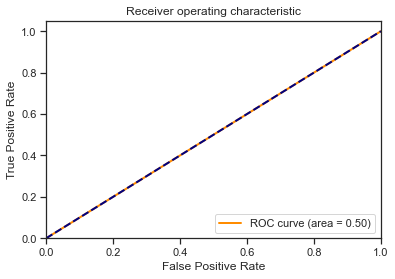

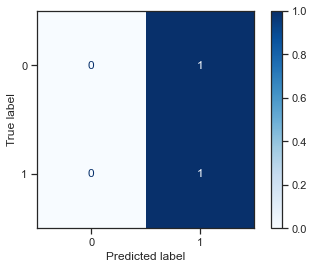

*****************************************************
SVC(gamma=140)
*****************************************************


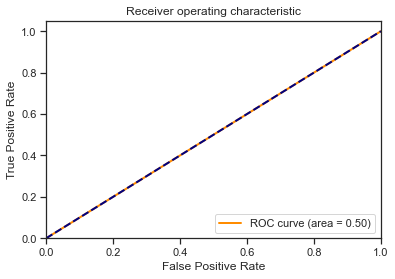

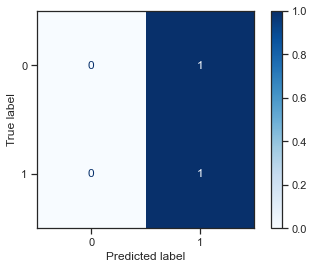

*****************************************************
DecisionTreeClassifier(max_depth=3, min_samples_split=10)
*****************************************************


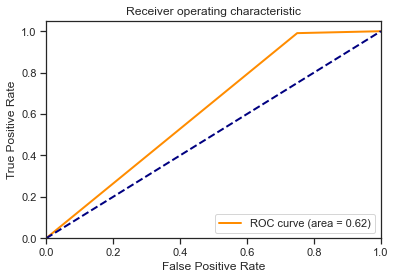

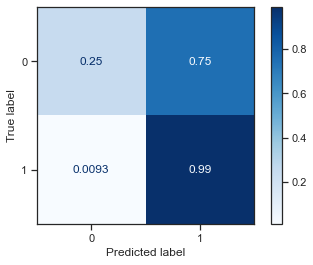

*****************************************************
RandomForestClassifier(max_depth=5, n_estimators=10, random_state=8)
*****************************************************


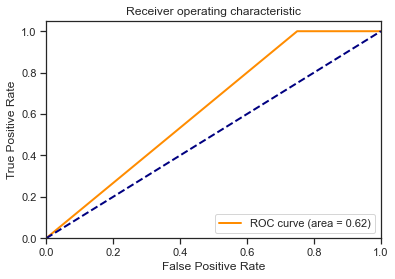

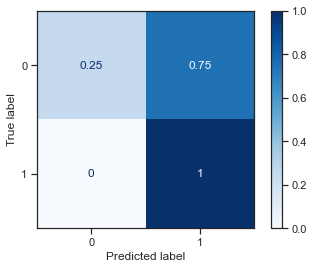

*****************************************************
GradientBoostingClassifier(n_estimators=7)
*****************************************************


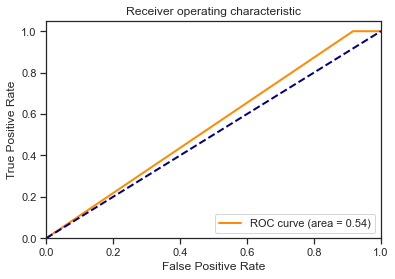

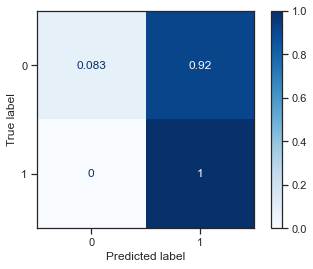

In [101]:
for model_name, model in clas_models_grid.items():
    clas_train_model(model_name, model, clasMetricLogger)

In [102]:
#Формирование выводов о качестве построенных моделей на основе выбранных метрик.

In [103]:
# Метрики качества модели
clas_metrics = clasMetricLogger.df['metric'].unique()
clas_metrics

array(['precision', 'recall', 'f1', 'roc_auc'], dtype=object)

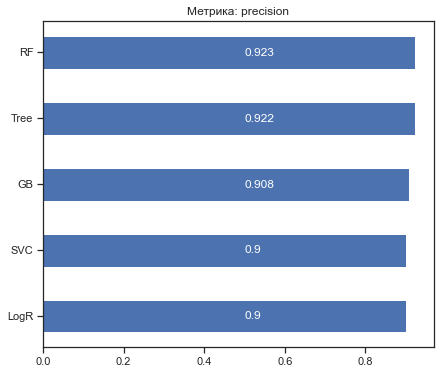

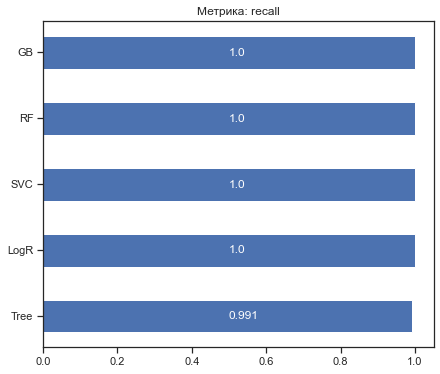

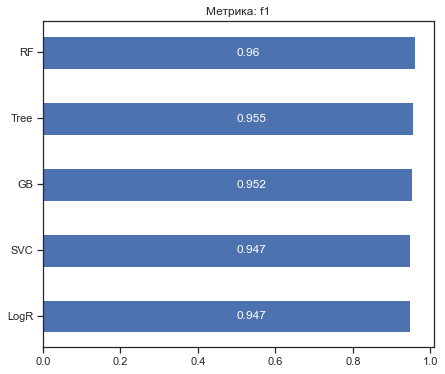

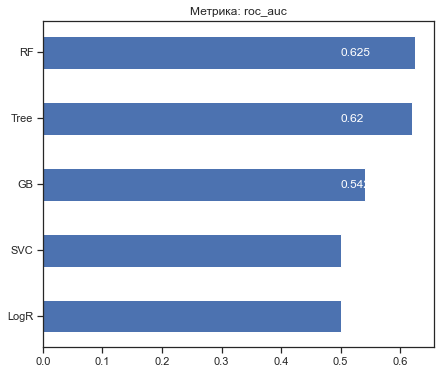

In [104]:
# Построим графики метрик качества модели
for metric in clas_metrics:
    clasMetricLogger.plot('Метрика: ' + metric, metric, figsize=(7, 6))